In [ ]:
print('hello')

hello


In [ ]:
pip install joblib

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import random
import joblib

In [ ]:
# Set random seeds for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [ ]:
df = pd.read_csv("initial_hackathon.csv")
df.head()

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,53:45.7,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,52:45.7,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,51:45.7,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,50:45.7,36.654747,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,49:45.7,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient ID                200020 non-null  int64  
 1   Heart Rate                200020 non-null  int64  
 2   Respiratory Rate          200020 non-null  int64  
 3   Timestamp                 200020 non-null  object 
 4   Body Temperature          200020 non-null  float64
 5   Oxygen Saturation         200020 non-null  float64
 6   Systolic Blood Pressure   200020 non-null  int64  
 7   Diastolic Blood Pressure  200020 non-null  int64  
 8   Age                       200020 non-null  int64  
 9   Gender                    200020 non-null  object 
 10  Weight (kg)               200020 non-null  float64
 11  Height (m)                200020 non-null  float64
 12  Derived_HRV               200020 non-null  float64
 13  Derived_Pulse_Pressure    200020 non-null  i

In [ ]:
df.describe()

,Patient ID,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP
count,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000
mean,100010.500000,79.533747,15.489451,36.748353,97.504372,124.437971,79.499625,53.446275,74.996419,1.750031,0.099970,44.938346,25.003625,94.479074
std,57740.944759,11.552894,2.294472,0.433290,1.442598,8.656946,5.757248,20.786802,14.471502,0.144554,0.028861,10.404945,6.447143,4.797891
min,1.000000,60.000000,12.000000,36.000004,95.000007,110.000000,70.000000,18.000000,50.000156,1.500001,0.050000,21.000000,12.505974,83.333333
25%,50005.750000,70.000000,13.000000,36.372613,96.256859,117.000000,75.000000,35.000000,62.423615,1.624777,0.074955,37.000000,20.134367,91.000000
50%,100010.500000,80.000000,15.000000,36.747741,97.509629,124.000000,79.000000,53.000000,74.977169,1.750478,0.099988,45.000000,24.320776,94.333333
75%,150015.250000,90.000000,17.000000,37.123003,98.755722,132.000000,84.000000,71.000000,87.539510,1.875310,0.124917,53.000000,29.187169,98.000000
max,200020.000000,99.000000,19.000000,37.499992,99.999962,139.000000,89.000000,89.000000,99.999765,1.999997,0.149999,69.000000,44.376487,105.666667


In [ ]:
df.isna().sum()

,0
Patient ID,0
Heart Rate,0
Respiratory Rate,0
Timestamp,0
Body Temperature,0
Oxygen Saturation,0
Systolic Blood Pressure,0
Diastolic Blood Pressure,0
Age,0
Gender,0


In [ ]:
df.columns

Index(['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp',
       'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)',
       'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI',
       'Derived_MAP', 'Risk Category'],
      dtype='object')

In [ ]:
df.value_counts('Risk Category')

,count
Risk Category,
High Risk,105115
Low Risk,94905


<Axes: ylabel='count'>

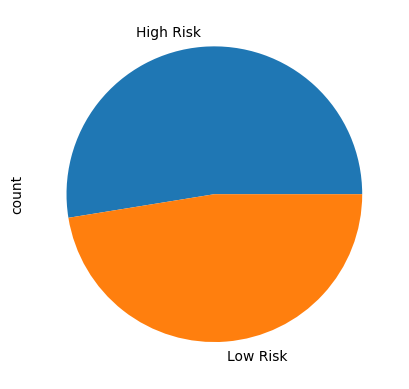

In [ ]:
df['Risk Category'].value_counts().plot.pie()

In [ ]:
df['Risk Category'].unique()

array(['High Risk', 'Low Risk'], dtype=object)

In [ ]:
df = df.drop_duplicates()
df = df.drop(['Timestamp', 'Patient ID', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP'], axis='columns')
df.head(10)

,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Risk Category
0,60,12,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,High Risk
1,63,18,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,High Risk
2,63,15,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,Low Risk
3,99,16,36.654747,95.011801,118,72,41,Female,96.006188,1.833629,High Risk
4,69,16,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,High Risk
5,79,12,36.884979,95.987129,130,70,22,Male,79.869933,1.922334,Low Risk
6,81,17,37.273640,99.456716,118,84,43,Male,57.846565,1.831484,High Risk
7,96,15,36.852633,97.124125,135,77,72,Female,71.758972,1.603888,High Risk
8,83,12,36.044191,98.584497,111,84,50,Male,79.295332,1.672735,Low Risk
9,66,15,36.957178,97.916267,131,77,61,Male,53.923400,1.896381,High Risk


In [ ]:
df.columns

Index(['Heart Rate', 'Respiratory Rate', 'Body Temperature',
       'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)',
       'Height (m)', 'Risk Category'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Risk Category'] = label_encoder.fit_transform(df['Risk Category'])

In [ ]:
X = df.drop('Risk Category', axis='columns').values
y = df['Risk Category'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [ ]:
# Define DataLoader with seed
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    worker_init_fn=seed_worker,
    generator=torch.Generator().manual_seed(seed)
)

test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    worker_init_fn=seed_worker,
    generator=torch.Generator().manual_seed(seed)
)

In [ ]:
 #Define the DNN model
class DNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [ ]:
input_size = X_train.shape[1]
hidden_size = 128
output_size = 1
learning_rate = 0.0001
num_epochs = 20

model = DNN(input_size, hidden_size, output_size)

In [ ]:
# Initialize model weights
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

model.apply(init_weights)

DNN(
  (fc1): Linear(in_features=10, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    test_losses.append(test_loss / len(test_loader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')

Epoch [1/20], Train Loss: 0.2455, Test Loss: 0.1113
Epoch [2/20], Train Loss: 0.0865, Test Loss: 0.0692
Epoch [3/20], Train Loss: 0.0582, Test Loss: 0.0512
Epoch [4/20], Train Loss: 0.0437, Test Loss: 0.0397
Epoch [5/20], Train Loss: 0.0350, Test Loss: 0.0326
Epoch [6/20], Train Loss: 0.0294, Test Loss: 0.0277
Epoch [7/20], Train Loss: 0.0253, Test Loss: 0.0245
Epoch [8/20], Train Loss: 0.0224, Test Loss: 0.0215
Epoch [9/20], Train Loss: 0.0198, Test Loss: 0.0204
Epoch [10/20], Train Loss: 0.0179, Test Loss: 0.0186
Epoch [11/20], Train Loss: 0.0164, Test Loss: 0.0171
Epoch [12/20], Train Loss: 0.0151, Test Loss: 0.0167
Epoch [13/20], Train Loss: 0.0140, Test Loss: 0.0139
Epoch [14/20], Train Loss: 0.0130, Test Loss: 0.0137
Epoch [15/20], Train Loss: 0.0122, Test Loss: 0.0134
Epoch [16/20], Train Loss: 0.0115, Test Loss: 0.0125
Epoch [17/20], Train Loss: 0.0110, Test Loss: 0.0120
Epoch [18/20], Train Loss: 0.0104, Test Loss: 0.0107
Epoch [19/20], Train Loss: 0.0099, Test Loss: 0.0120
Ep

Accuracy: 99.60 %
Precision: 99.33 %
Recall: 99.82 %
F1-Score: 99.58 %
ROC AUC Score: 1.00


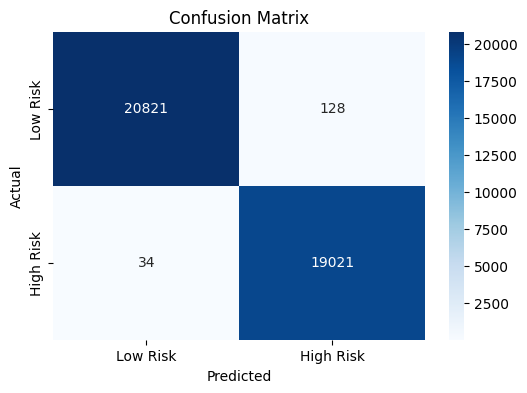

In [ ]:
# Evaluate the model
model.eval()
y_true = []
y_pred = []
y_pred_proba = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = torch.sigmoid(outputs) >= 0.5
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())
        y_pred_proba.extend(torch.sigmoid(outputs).numpy())

y_true = np.array(y_true).flatten()
y_pred = np.array(y_pred).flatten()
y_pred_proba = np.array(y_pred_proba).flatten()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_proba)

print(f"Accuracy: {accuracy *100:.2f} %")
print(f"Precision: {precision *100:.2f} %")
print(f"Recall: {recall *100:.2f} %")
print(f"F1-Score: {f1 *100:.2f} %")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()



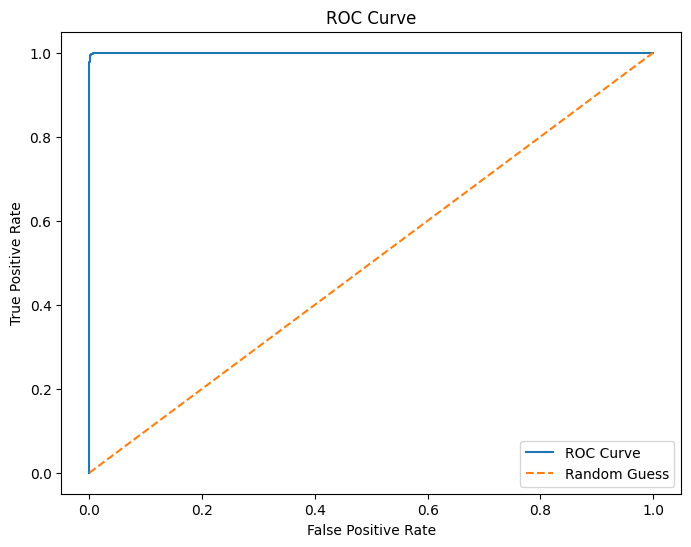

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
model_save_path = "human_vital_sign_model.pth"
torch.save(model.state_dict(), model_save_path)

scaler_save_path = "scaler.pkl"
joblib.dump(scaler, scaler_save_path)

label_encoder_save_path = "label_encoder.pkl"
joblib.dump(label_encoder, label_encoder_save_path)

['label_encoder.pkl']